1. Add one more hidden layer to autoencoder
2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.6937 - val_loss: 0.6936
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.6934 - val_loss: 0.6934
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


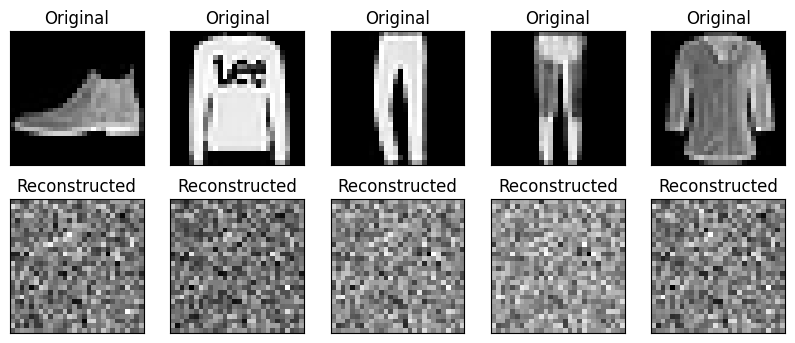

In [13]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(128, activation='relu')(input_img)  # Add a hidden layer with 128 neurons
encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(128, activation='relu')(encoded)  # Add a hidden layer with 128 neurons in decoder
decoded = Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Perform prediction on the test data
reconstructed_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed images using Matplotlib
n = 5  # Number of test samples to display
plt.figure(figsize=(10, 4))

# Display original images
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Display reconstructed images
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the images
plt.show()


denoisening autoencoder
 Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0713 - pixelwise_accuracy: 0.4691 - val_loss: 0.0253 - val_pixelwise_accuracy: 0.5022 - learning_rate: 0.0010
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.0241 - pixelwise_accuracy: 0.5046 - val_loss: 0.0223 - val_pixelwise_accuracy: 0.5059 - learning_rate: 0.0010
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0205 - pixelwise_accuracy: 0.5055 - val_loss: 0.0190 - val_pixelwise_accuracy: 0.5058 - learning_rate: 0.0010
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0187 - pixelwise_accuracy: 0.5061 - val_loss: 0.0179 - val_pixelwise_accuracy: 0.5060 - learning_rate: 0.0010
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0175 - pixelwise_accuracy: 0.5065 - val_loss: 0.0171 - val_pixelwise_accuracy: 0.5065 - learning_rate: 0.0010
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 0.0165 - pixelwise_accuracy: 0.5070 - val_loss: 0.0165 - val_pixelwise_acc

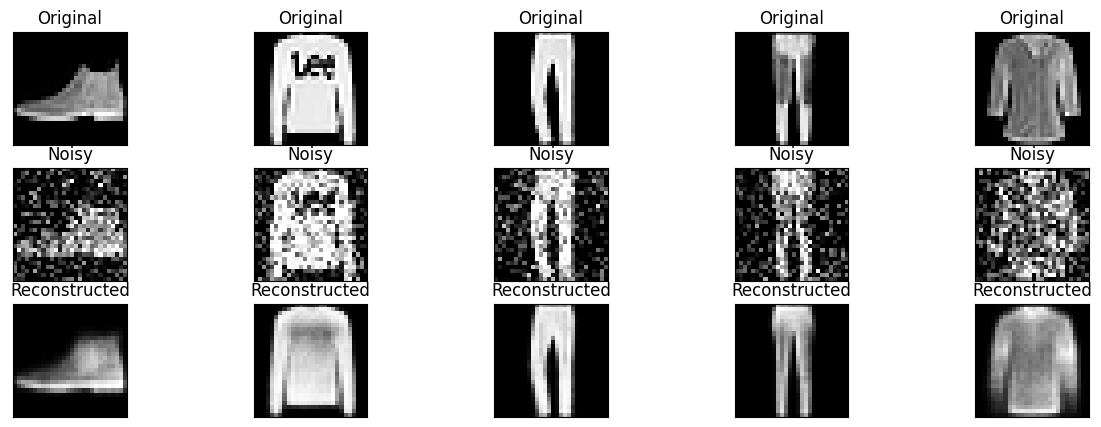

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.callbacks import TerminateOnNaN, History, ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the size of our encoded representations
encoding_dim = 64  # Increase the dimension to capture more features

# This is our input placeholder
input_img = Input(shape=(784,))

# Encoder network with additional layers
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder network with additional layers
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Define a custom pixel-wise accuracy metric using TensorFlow
def pixelwise_accuracy(y_true, y_pred):
    return tf.reduce_mean(tf.cast(tf.equal(y_true, tf.round(y_pred)), tf.float32))

# Compile with custom pixel-wise accuracy metric
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=[pixelwise_accuracy])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing noise to the data
noise_factor = 0.3  # Adjusted noise factor
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the directory to save model checkpoints
checkpoint_dir = "./model_checkpoints"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Define Callbacks
callbacks = [
    TerminateOnNaN(),  # Stop training if NaN loss is encountered
    History(),  # Track history of training
    ModelCheckpoint(filepath=os.path.join(checkpoint_dir, "model-{epoch:02d}.keras"), save_best_only=True, monitor='val_loss', mode='min'),  # Save best model based on validation loss
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),  # Stop early if no improvement in validation loss
    LearningRateScheduler(lambda epoch: 0.001 * (0.5 ** (epoch // 5))),  # Decrease learning rate by half every 5 epochs
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)  # Reduce learning rate if validation loss plateaus
]

# Train the autoencoder with noisy data and callbacks
history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,  # Increased epochs to observe early stopping
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
    callbacks=callbacks
)

# Predict on the test set
reconstructed_imgs = autoencoder.predict(x_test_noisy)


# Visualize the original, noisy, and reconstructed images
n = 5  # Number of images to display

plt.figure(figsize=(15, 5))

# Display original images
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Display noisy images
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.title("Noisy")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Display reconstructed images
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the images
plt.show()




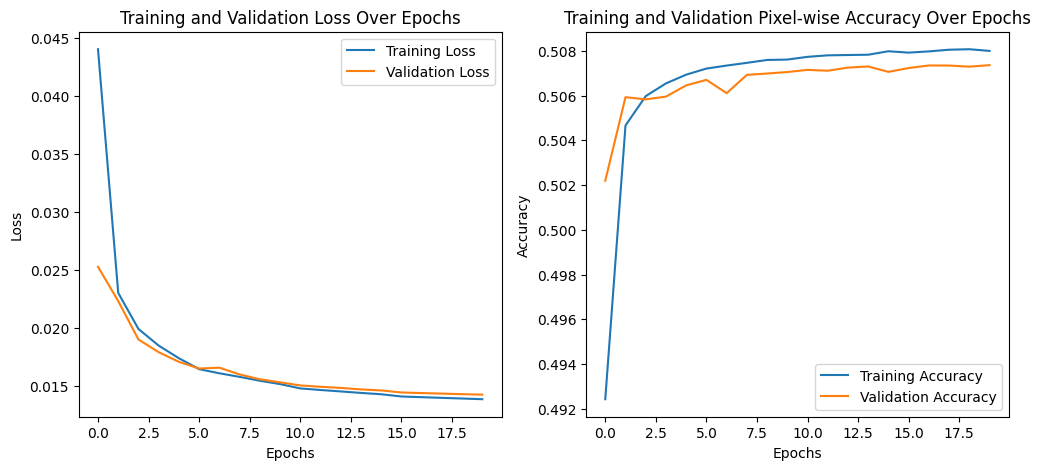

In [15]:
# Plot Training and Validation Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training and Validation Pixel-wise Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['pixelwise_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_pixelwise_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Pixel-wise Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()